In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
biometric_df = pd.read_csv("aadhaar_biometric_merged.csv", low_memory=False)
demographic_df = pd.read_csv("aadhaar_demographic_merged.csv", low_memory=False)
enrolment_df = pd.read_csv("aadhaar_enrolment_merged.csv", low_memory=False)

# Convert date column
biometric_df["date"] = pd.to_datetime(biometric_df["date"], dayfirst=True)
demographic_df["date"] = pd.to_datetime(demographic_df["date"], dayfirst=True)
enrolment_df["date"] = pd.to_datetime(enrolment_df["date"], dayfirst=True)

<Figure size 640x480 with 0 Axes>

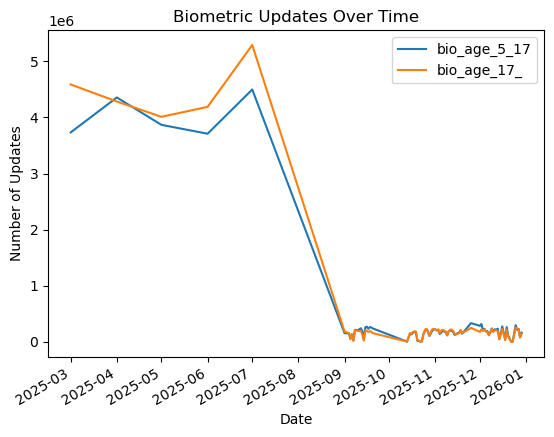

In [43]:
# ------------------ Plot 1: Biometric Updates Trend ------------------
bio_trend = biometric_df.groupby("date")[["bio_age_5_17", "bio_age_17_"]].sum()

plt.figure()
bio_trend.plot()
plt.title("Biometric Updates Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Updates")
plt.show()

<Figure size 640x480 with 0 Axes>

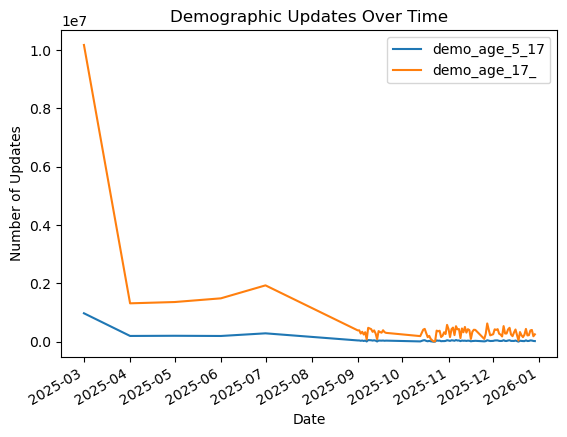

In [44]:
# ------------------ Plot 2: Demographic Updates Trend ------------------
demo_trend = demographic_df.groupby("date")[["demo_age_5_17", "demo_age_17_"]].sum()

plt.figure()
demo_trend.plot()
plt.title("Demographic Updates Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Updates")
plt.show()


<Figure size 640x480 with 0 Axes>

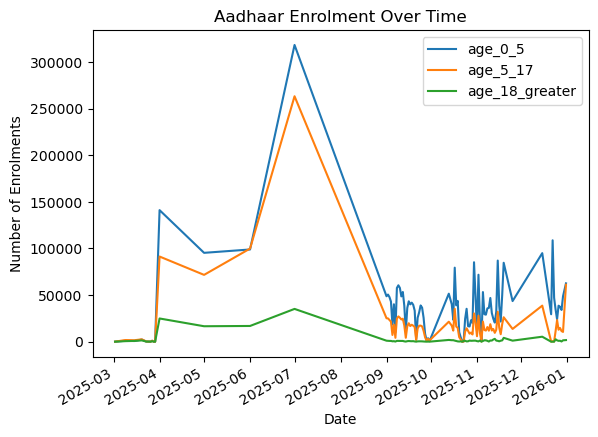

In [46]:
# ------------------ Plot 3: Enrolment Trend ------------------
enrol_trend = enrolment_df.groupby("date")[["age_0_5", "age_5_17", "age_18_greater"]].sum()

plt.figure()
enrol_trend.plot()
plt.title("Aadhaar Enrolment Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Enrolments")
plt.show()

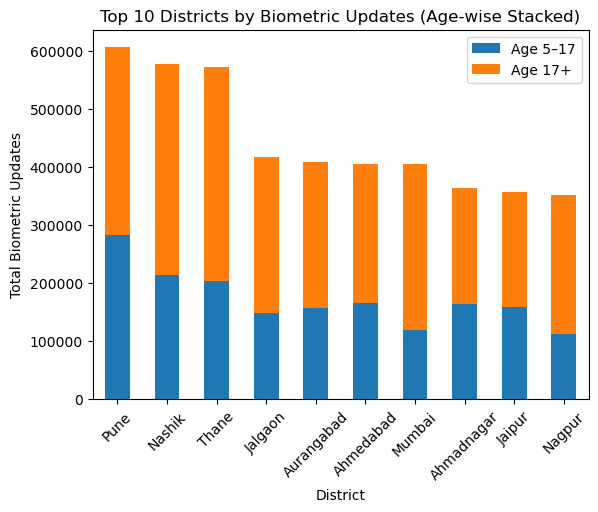

In [3]:
import matplotlib.pyplot as plt

# District-wise sum for both age groups
bio_district = (
    biometric_df
    .groupby("district")[["bio_age_5_17", "bio_age_17_"]]
    .sum()
)

# Select top 10 districts by total updates
bio_district["total"] = bio_district["bio_age_5_17"] + bio_district["bio_age_17_"]
top10 = bio_district.sort_values("total", ascending=False).head(10)

# Drop helper column
top10 = top10.drop(columns="total")

# Plot stacked bar chart (ONE bar per district)
top10.plot(kind="bar", stacked=True)

plt.title("Top 10 Districts by Biometric Updates (Age-wise Stacked)")
plt.xlabel("District")
plt.ylabel("Total Biometric Updates")
plt.xticks(rotation=45)
plt.legend(["Age 5–17", "Age 17+"])
plt.show()


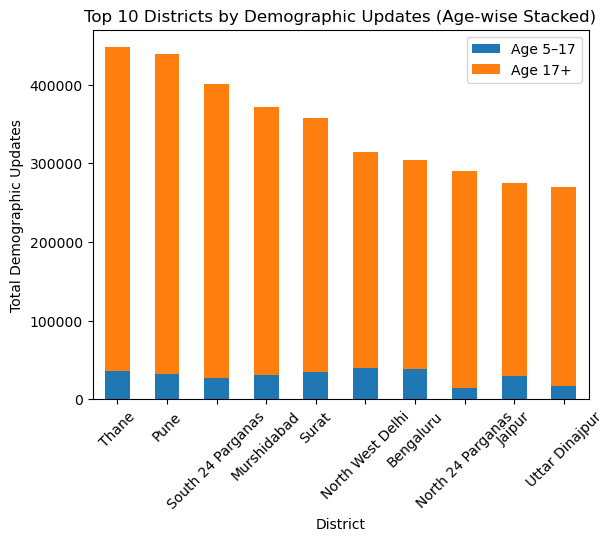

In [4]:
import matplotlib.pyplot as plt

# District-wise sum for both age groups
demo_district = (
    demographic_df
    .groupby("district")[["demo_age_5_17", "demo_age_17_"]]
    .sum()
)

# Select top 10 districts by total updates
demo_district["total"] = demo_district["demo_age_5_17"] + demo_district["demo_age_17_"]
top10_demo = demo_district.sort_values("total", ascending=False).head(10)

# Drop helper column
top10_demo = top10_demo.drop(columns="total")

# Plot stacked bar chart (ONE bar per district)
top10_demo.plot(kind="bar", stacked=True)

plt.title("Top 10 Districts by Demographic Updates (Age-wise Stacked)")
plt.xlabel("District")
plt.ylabel("Total Demographic Updates")
plt.xticks(rotation=45)
plt.legend(["Age 5–17", "Age 17+"])
plt.show()


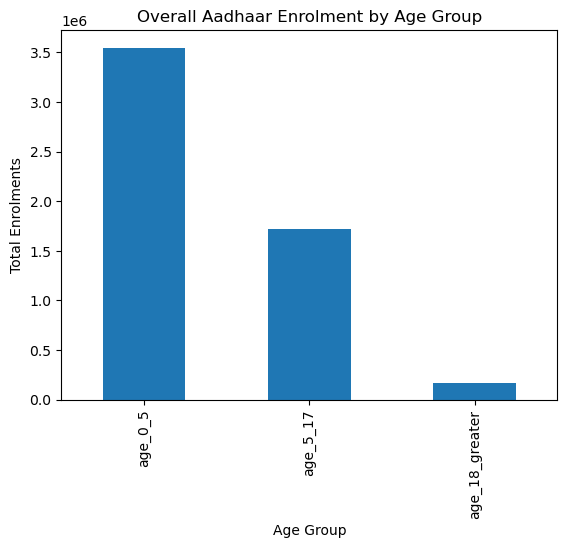

In [49]:
age_totals = enrolment_df[["age_0_5", "age_5_17", "age_18_greater"]].sum()

plt.figure()
age_totals.plot(kind="bar")
plt.title("Overall Aadhaar Enrolment by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Enrolments")
plt.show()


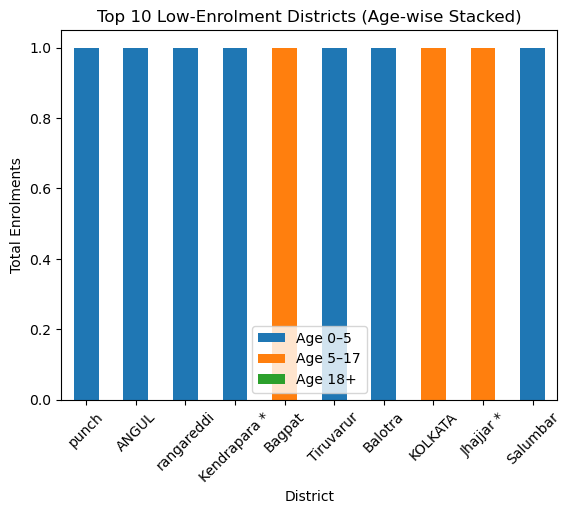

In [5]:
import matplotlib.pyplot as plt

# District-wise enrolment by age groups
enrol_district = (
    enrolment_df
    .groupby("district")[["age_0_5", "age_5_17", "age_18_greater"]]
    .sum()
)

# Total enrolment
enrol_district["total"] = (
    enrol_district["age_0_5"] +
    enrol_district["age_5_17"] +
    enrol_district["age_18_greater"]
)

# Select top 10 LOW enrolment districts
low10 = enrol_district.sort_values("total").head(10)

# Drop helper column
low10 = low10.drop(columns="total")

# Plot stacked bar chart (ONE bar per district)
low10.plot(kind="bar", stacked=True)

plt.title("Top 10 Low-Enrolment Districts (Age-wise Stacked)")
plt.xlabel("District")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.legend(["Age 0–5", "Age 5–17", "Age 18+"])
plt.show()


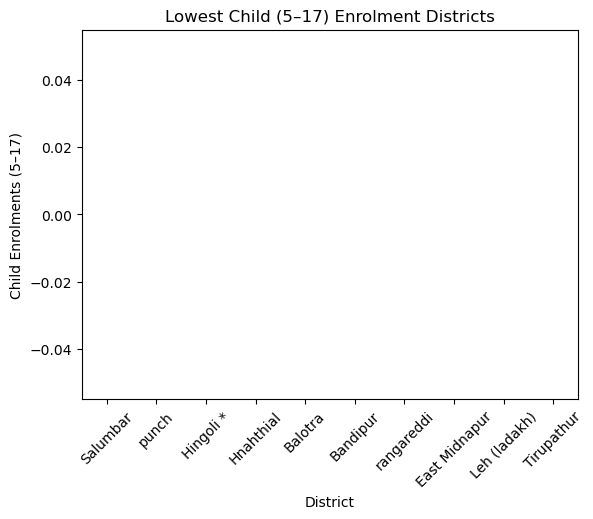

In [51]:
child_enrolment = (
    enrolment_df.groupby("district")["age_5_17"]
    .sum()
    .sort_values()
    .head(10)
)

plt.figure()
child_enrolment.plot(kind="bar")
plt.title("Lowest Child (5–17) Enrolment Districts")
plt.xlabel("District")
plt.ylabel("Child Enrolments (5–17)")
plt.xticks(rotation=45)
plt.show()
